In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasgui import show
import sqlite3

In [14]:
# Define function to execute queries
def execute_query(database_path, query):
    """Execute a SQL query on a given database and return the results."""
    conn = sqlite3.connect(database_path)
    cursor = conn.cursor()
    cursor.execute(query)
    results = cursor.fetchall()
    conn.close()
    return results

# Query for Deliveroo
query_deli = """
SELECT 
    postal_code AS postal_code,
    'Deliveroo' AS platform
FROM 
    restaurants
WHERE 
    postal_code LIKE '____' 
ORDER BY 
    postal_code;
"""

# Query for Takeaway
query_take = """
SELECT 
    postalCode AS postal_code,
    'Takeaway' AS platform
FROM 
    locations
WHERE 
    postal_code LIKE '____' 
ORDER BY 
    postalCode; 
"""

# Query for UberEats
query_uber = """
SELECT 
    region AS postal_code,
    'Ubereats' AS platform
FROM 
    locations
WHERE 
    region LIKE '____'  
ORDER BY 
    region; 
"""

# Execute queries and get results
results_deli = execute_query("Databases/deliveroo.db", query_deli)
results_take = execute_query("Databases/takeaway.db", query_take)
results_uber = execute_query("Databases/ubereats.db", query_uber)

# Combine results into one list and create a DataFrame
combined_results = results_deli + results_take + results_uber
columns = ['Postal Code', 'Platform']
df = pd.DataFrame(combined_results, columns=columns)
# Convert Postal Code to integer
df['Postal Code'] = df['Postal Code'].astype(int)

# Display the result
print(df)




      Postal Code   Platform
0            1000  Deliveroo
1            1000  Deliveroo
2            1000  Deliveroo
3            1000  Deliveroo
4            1000  Deliveroo
...           ...        ...
7715         9990   Ubereats
7716         9990   Ubereats
7717         9990   Ubereats
7718         9991   Ubereats
7719         9992   Ubereats

[7720 rows x 2 columns]


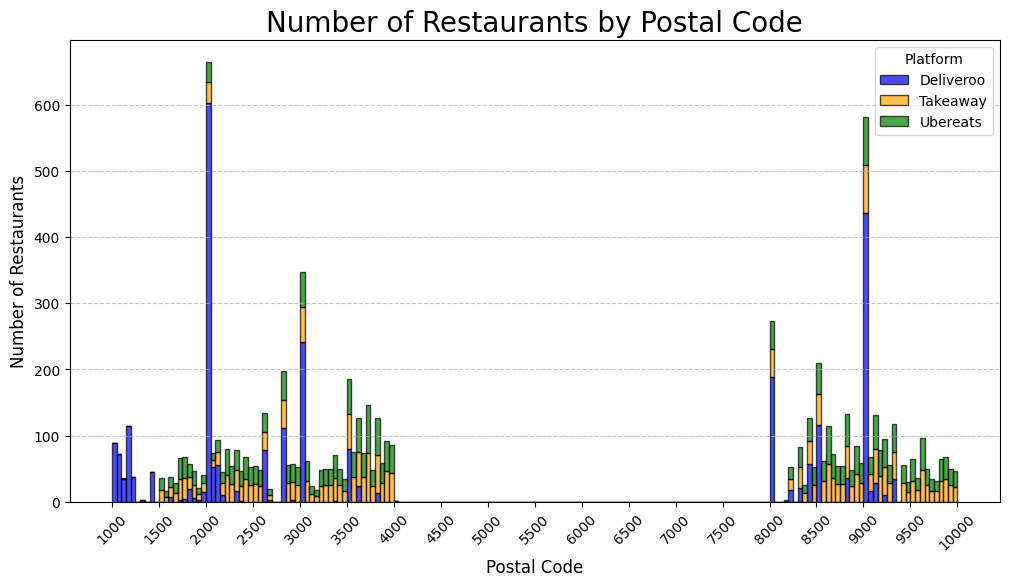

In [15]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(12, 6))

# Define the bin edges
bins = range(1000, 10001, 50)  # Postal codes between 1000 and 10000, in steps of 50

# Prepare data for stacked histogram
platforms = df['Platform'].unique()
colors = {'Deliveroo': 'blue', 'Takeaway': 'orange', 'Ubereats': 'green'}  # Define colors for each platform

# Prepare a list of postal code arrays for each platform
data = [df[df['Platform'] == platform]['Postal Code'] for platform in platforms]

# Plot stacked histogram
plt.hist(data, bins=bins, alpha=0.7, label=platforms, edgecolor='black', color=[colors[platform] for platform in platforms], stacked=True)

# Add labels, title, and legend
plt.title('Number of Restaurants by Postal Code', fontsize=20)
plt.xlabel('Postal Code', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(ticks=range(1000, 10001, 500), rotation=45)  # Tick positions every 500
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Platform')

# Show the plot
plt.show()
